<a href="https://colab.research.google.com/github/2303a51729Ajaykumar/machine-learning/blob/main/Project_11_Medical_insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
insurance_data=pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
# getting some informstion about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Catagorical columns

*   sex
*   Smoker
*   Region



In [ ]:
# checking for missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-d671e229909f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


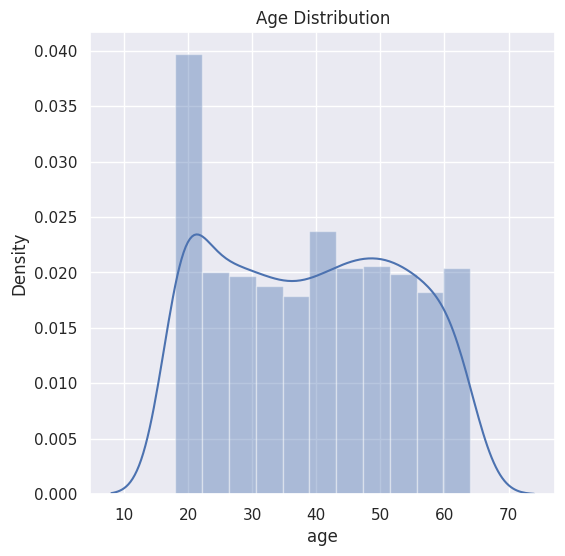

In [ ]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

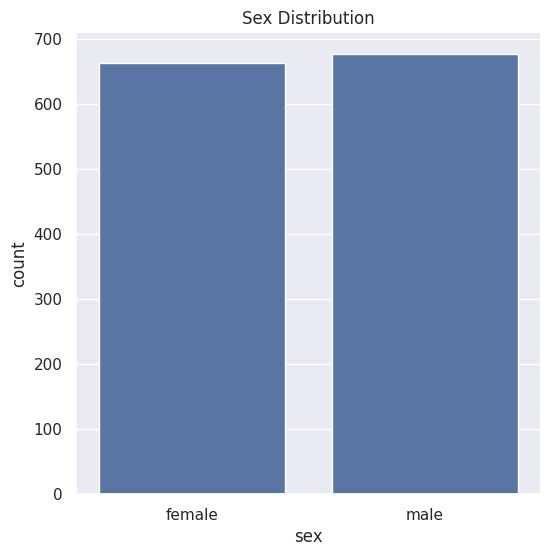

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-11-f9554211697e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


Text(0.5, 1.0, 'BMI Distribution')

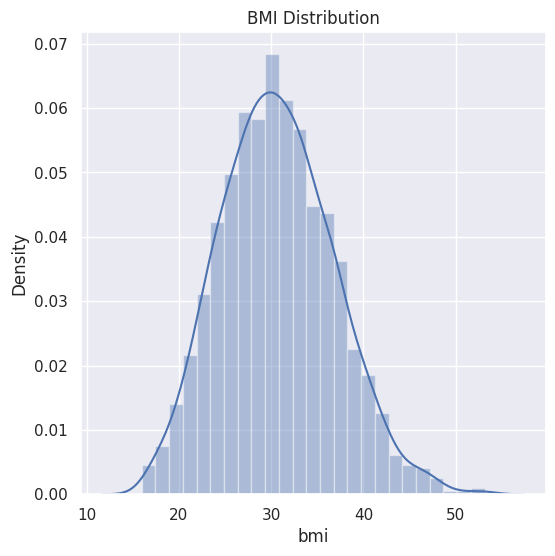

In [ ]:
#distribution of bmi column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')

Normal BMI Range -> 18.5 to 24.9

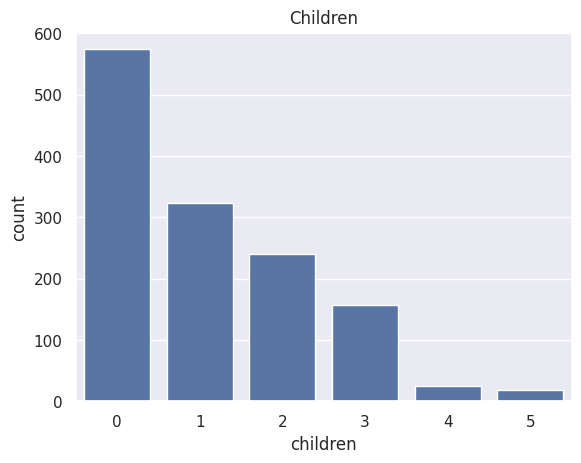

In [ ]:
sns.countplot(x='children',data=insurance_data)
plt.title('Children')
plt.show()

In [ ]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


Text(0.5, 1.0, 'Smoker')

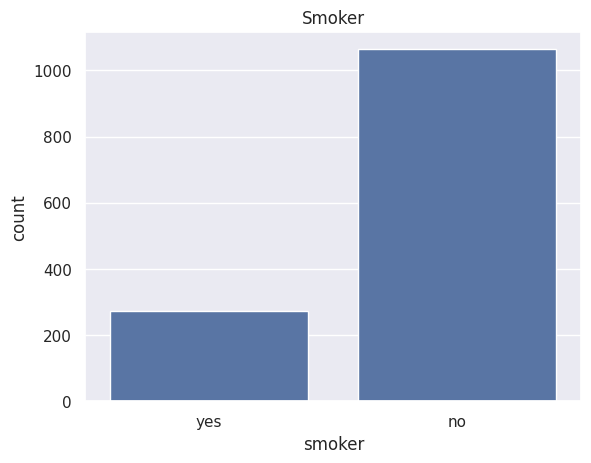

In [ ]:
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')

In [ ]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


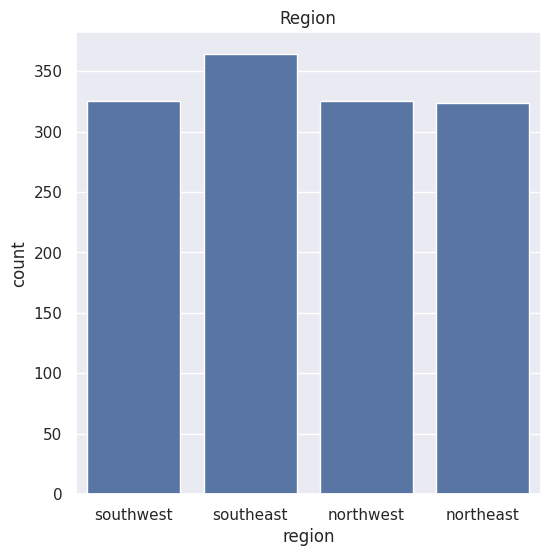

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

In [ ]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-19-603251280c22>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


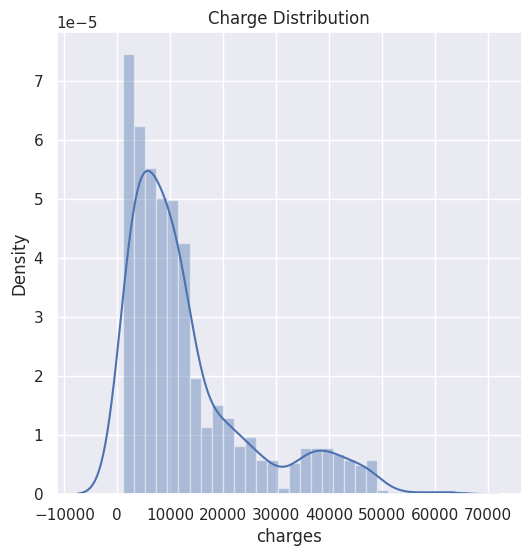

In [ ]:
# distribution of chargw values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charge Distribution')
plt.show()

Data Preprocessing

Encoding

changing the catagirical data to numerical labels

In [ ]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-21-0e68214f26e8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-21-0e68214f26e8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and target values

In [ ]:
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train and testing the data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

Linear Model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [ ]:
#prediction on trainig data
training_data_prediction=model.predict(X_train)

In [ ]:
#r2 Error
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print('R squared Error:',r2_train)

R squared Error: 0.751505643411174


In [ ]:
#prediction on testing data
testing_data_prediction=model.predict(X_test)

In [ ]:
#r2 Error
r2_test=metrics.r2_score(Y_test,testing_data_prediction)

In [ ]:
print(r2_test)

0.7447273869684076


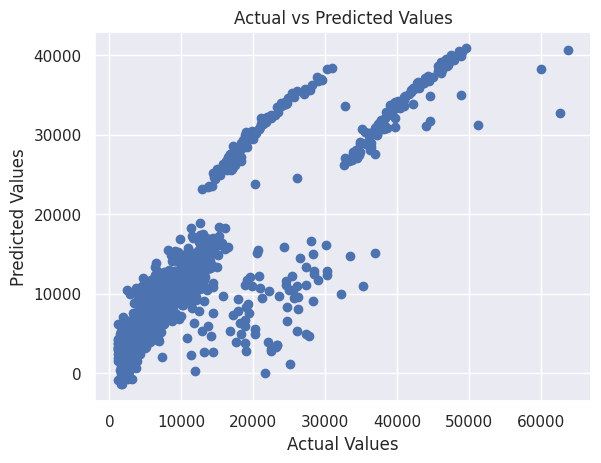

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

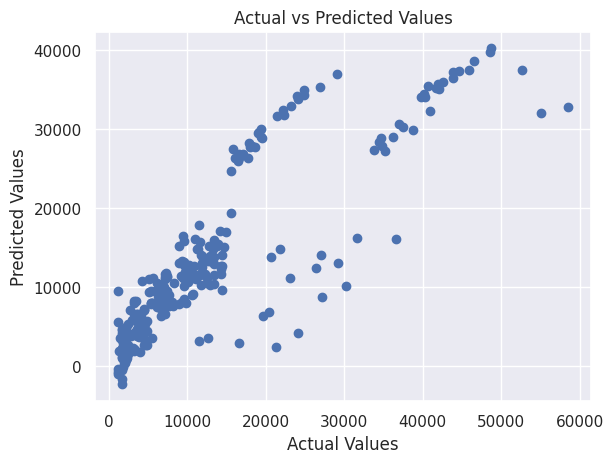

In [ ]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Predictive System

In [ ]:
input_data=(31,1,25.74,0,1,0)
#changing input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
